In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

def scaled_dot_product_attention(Q, K, V):
    d_k = Q.shape[-1]
    scores = np.matmul(Q, K.T) / np.sqrt(d_k)
    weights = softmax(scores)
    output = np.matmul(weights, V)
    return output, weights

def plot_attention_weights(tokens, attention_weights):
    plt.figure(figsize=(8, 6))
    sns.heatmap(attention_weights, annot=True, fmt=".2f", cmap="YlGnBu",
                xticklabels=tokens, yticklabels=tokens)
    plt.title("Attention Weight Heatmap")
    plt.xlabel("Key / 입력 단어")
    plt.ylabel("Query / 기준 단어")
    plt.show()

In [2]:
# 실험 설정
tokens = ["나는", "오늘", "밥을", "먹었다"]
embedding_dim = 32

In [3]:
# 1. 명확히 구별되는 수동 임베딩 (32차원 one-hot 흉내)
token_embeddings = {
    "나는": np.eye(embedding_dim)[0],
    "오늘": np.eye(embedding_dim)[1],
    "밥을": np.eye(embedding_dim)[2],
    "먹었다": np.eye(embedding_dim)[3],
}
x = np.array([token_embeddings[t] for t in tokens])  # shape: (4, 32)
x

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
# 2. W_Q, W_K, W_V 설정 (그대로 쓰거나 약간의 섞임 부여 가능)
np.random.seed(42)
W_Q = np.random.randn(embedding_dim, embedding_dim)
W_K = np.random.randn(embedding_dim, embedding_dim)
W_V = np.random.randn(embedding_dim, embedding_dim)
W_Q, W_K, W_V

(array([[ 0.49671415, -0.1382643 ,  0.64768854, ..., -0.29169375,
         -0.60170661,  1.85227818],
        [-0.01349722, -1.05771093,  0.82254491, ..., -0.18565898,
         -1.10633497, -1.19620662],
        [ 0.81252582,  1.35624003, -0.07201012, ..., -0.32766215,
         -0.39210815, -1.46351495],
        ...,
        [ 1.56552403, -0.06575026, -0.55519953, ...,  0.45675322,
          0.56976728,  0.44770856],
        [ 0.64272276,  1.32915253,  0.19652117, ...,  0.02688584,
          0.20838281, -2.04173487],
        [-0.24717738, -0.68198425, -1.00162001, ..., -0.5737    ,
         -0.02435459,  2.14227036]], shape=(32, 32)),
 array([[ 1.72754317e+00,  4.36323670e-01,  3.80034782e-02, ...,
          2.60673766e-01, -5.50305154e-01, -6.71623368e-01],
        [-2.55540710e-02,  1.17272902e+00,  5.43600155e-01, ...,
          4.30041647e-01,  1.03028345e+00,  2.38789159e-01],
        [-2.59042146e-01, -1.96349849e-01, -7.16012594e-02, ...,
         -5.76187970e-02,  2.01099047e-0

In [5]:
Q = x @ W_Q
K = x @ W_K
V = x @ W_V
Q, K, V

(array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
         -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
         -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
         -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
          1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
          0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
         -0.60170661,  1.85227818],
        [-0.01349722, -1.05771093,  0.82254491, -1.22084365,  0.2088636 ,
         -1.95967012, -1.32818605,  0.19686124,  0.73846658,  0.17136828,
         -0.11564828, -0.3011037 , -1.47852199, -0.71984421, -0.46063877,
          1.05712223,  0.34361829, -1.76304016,  0.32408397, -0.38508228,
         -0.676922  ,  0.61167629,  1.03099952,  0.93128012, -0.83921752,
         -0.30921238,  0.33126343,  0.97554513, -0.47917424, -0.18565898,
         -1.10633497, -1.19620662],
        [ 0.81252582,  1.35624003, -0.07

In [6]:
# 3. Attention 계산
output, weights = scaled_dot_product_attention(Q, K, V)
output, weights

(array([[-0.11453053, -0.05738248,  0.10321543, -1.04130746, -0.43192863,
         -0.8646357 , -1.50993117, -0.23715366,  0.62148424,  0.91116377,
          0.04506594, -0.01802348,  0.39691499, -0.11821209,  0.03326233,
          0.40139475,  0.39943984, -0.14424535, -0.95432376,  0.2334463 ,
          0.93915525,  0.24874928, -0.05785653,  0.34332897, -0.20764839,
          1.02138399, -0.7686249 , -0.51009521,  0.17028792,  0.56685379,
         -0.17119402,  0.07858818],
        [-0.1244097 ,  0.56974144, -0.77134342, -1.5104768 , -0.45901146,
         -1.0712502 , -0.78514348,  0.07083137, -0.15769542,  1.00457576,
         -0.05111377,  0.03975772,  0.42363237, -0.60192074,  0.77753083,
          0.13559356,  0.19522719, -0.54671561, -1.19337084,  0.59855552,
          0.90881041, -0.37589428, -0.3735645 ,  0.52614654, -0.58399924,
          1.03304311, -0.45307997,  0.10635556, -0.0619608 ,  0.61495794,
         -0.45730382,  0.27530606],
        [-0.12155267,  0.53796878, -0.74

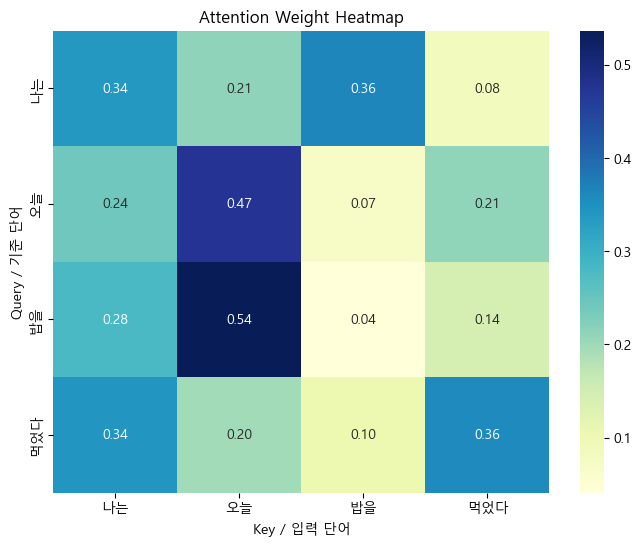

In [7]:
# 4. 시각화
plot_attention_weights(tokens, weights)